# Twitter Hate Speech Analysis - Week 3
## Colin Green, Sean Zhang

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv('tfidf_df.csv')
df.drop(df.columns[0], axis=1,inplace=True)
#df['class'] = df['class'].astype('int')

In [26]:
df

,aa,aaaaaaaaand,aap,aaron,aaronmacgruder,ab,ability,abortion,about,abraham,...,zipperhead,zoe,zog,zone,zoom,zzzzzz,num_tokens,mention_count,url_count,hashtag_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0,0,0
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
2857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1,0,0
2858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0,0,0


<AxesSubplot:>

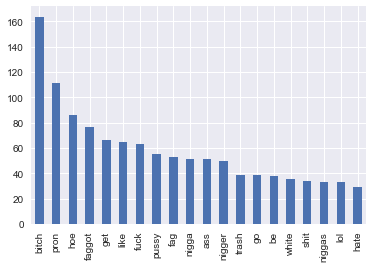

In [27]:
df_count=df.drop(columns = ['num_tokens','mention_count', 'url_count', 'hashtag_count', 'class']).sum()
df_largest = df_count.nlargest(20)
df_largest.plot(kind='bar')

In [28]:
features = df.drop(columns = 'class')
labels = df['class']

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

In [30]:


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, max_iter = 1000),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Colin/opt/anaconda3/envs/machinelearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Colin/opt/anaconda3/envs/machinelearning/

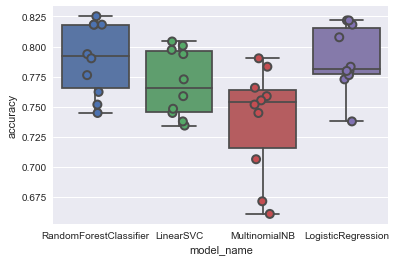

In [31]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [32]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.769231
LogisticRegression        0.789860
MultinomialNB             0.738811
RandomForestClassifier    0.789860
Name: accuracy, dtype: float64

In [40]:
from sklearn.model_selection import learning_curve
train_sizes = np.arange(100, 2500, 100).tolist()

train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(max_depth=5),
X = features,
y = labels, train_sizes = train_sizes, cv = CV,
scoring = 'accuracy')

In [41]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)
#print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
#print('\n', '-' * 20) # separator
#print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

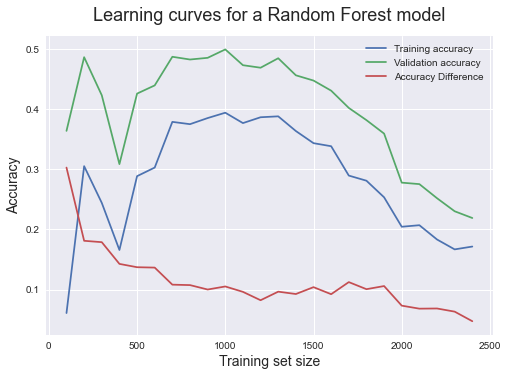

In [46]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, (1-train_scores_mean), label = 'Training Error')
plt.plot(train_sizes, (1-validation_scores_mean), label = 'Validation Error')
plt.plot(train_sizes, train_scores_mean - validation_scores_mean, label = 'Error Difference')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest model', fontsize = 18, y = 1.03)
plt.legend()

In [47]:
df_full = pd.read_csv('full_tfidf_df.csv')

In [48]:
df_full.drop(columns=['Unnamed: 0'], inplace=True)

In [49]:
df_full[['num_tokens','mention_count','url_count','hashtag_count']] = df_full[['num_tokens','mention_count','url_count','hashtag_count']].fillna(0)

In [50]:
df_full=df_full.astype('int')

In [51]:
df_full

,aa,aaaaaaaaand,aaahhhhh,aahahah,aaliyah,aap,aaron,aaronmacgruder,aaryn,ab,...,zoote,zrgrizz,zuko,zulema,zulu,zzzzzz,num_tokens,mention_count,url_count,hashtag_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0
20617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,0,0,0


In [52]:
#remove_n = 1000
#drop_indices = np.random.choice(df_full[df_full['class']==1].index, remove_n, replace=False)
#df_bal = df_full.drop(drop_indices)

In [53]:
features = df_full.drop(columns = 'class')
labels = df_full['class']

In [55]:
from sklearn.model_selection import learning_curve
CV = 5
train_sizes = np.arange(500, 16500,1000).tolist()
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(max_depth=5),
X = np.array(df_full.drop(columns = 'class')),
y = np.array(df_full['class']), train_sizes = train_sizes, cv = CV,
scoring = 'accuracy')

KeyboardInterrupt: 

In [ ]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, (1-train_scores_mean), label = 'Training Error')
plt.plot(train_sizes, (1-validation_scores_mean), label = 'Validation Error')
plt.plot(train_sizes, train_scores_mean - validation_scores_mean, label = 'Accuracy Error)
plt.xlabel('Training set size', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.title('Learning curves for a random forest model', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
train_error = 1- train_scores_mean 
validation_error = 1 - validation_scores_mean 

plt.style.use('seaborn')
plt.plot(train_sizes, train_error, label = 'Training error')
plt.plot(train_sizes, validation_error, label = 'Validation error')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a logistic regression model', fontsize = 18, y = 1.03)
plt.legend()